# Разработка прогнозных моделей для молочного хозяйства «Вольный луг»

ЦЕЛИ И ЗАДАЧИ:
- Разработать модель машинного обучения, которая поможет владельцу предприятия(фермеру) управлять рисками и принимать объективное решение о покупке.
- Для этого нужно создать две прогнозные модели для отбора бурёнок в поголовье:

Первая будет прогнозировать возможный удой коровы (целевой признак Удой);

Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

ХОД РАБОТЫ:

1) Загрузка и изучение данных

2) Предобработка данных

3) Исследовательский анализ данных

4) Корреляционный анализ признаков в датасете ferma_main.csv

5) Решение задачи регрессии

6) Решение задачи классификации

7) Сделать итоговые выводы


ОПИСАНИЕ ДАННЫХ:
1) Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.

Описание данных:

- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.

- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

2) Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 

Описание данных:

- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

3) Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

Описание данных:

- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.

- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

Импортируем сразу все нужные нам библиотеки

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import phik

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix


## Загрузка данных

In [3]:
data_main = pd.read_csv('/datasets/ferma_main.csv',  sep=';', decimal=',')
data_dad = pd.read_csv('/datasets/ferma_dad.csv',  sep=';', decimal=',')
data_cow_buy = pd.read_csv('/datasets/cow_buy.csv',  sep=';', decimal=',')

def check_data(name):
    print('общая информация ***************************************************************************************************')
    display(name.info())
    print('первые 5 строк *****************************************************************************************************')
    display(name.head())
    print('название столбцов **************************************************************************************************')
    display(name.columns)
    print('количество пропусков ***********************************************************************************************')
    print(name.isnull().sum())
    print('количество явных дубликатов ********************************************************************************************')
    print(name.duplicated().sum())
    display(name.describe().T)

# all_data = [data_main, data_dad, data_cow_buy]
# for data in all_data:
#     check_data(data)

Посмотрим данные о ferma_main.csv, который содержит данные о стаде фермера на текущий момент

In [4]:
check_data(data_main)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                  

None

первые 5 строк *****************************************************************************************************


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


название столбцов **************************************************************************************************


Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

количество пропусков ***********************************************************************************************
id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64
количество явных дубликатов ********************************************************************************************
5


,count,mean,std,min,25%,50%,75%,max
id,634.0,317.460568,183.096982,1.000,159.250,317.500,475.750,629.000
"Удой, кг",634.0,6187.025237,1638.401021,5204.000,5751.750,6130.500,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),634.0,14.542744,1.301301,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",634.0,1922.682965,182.392548,1660.000,1772.250,1880.500,2058.750,2349.000
СПО (Сахаро-протеиновое соотношение),634.0,0.912855,0.032209,0.840,0.890,0.930,0.940,0.960
"Жирность,%",634.0,3.603943,0.168020,2.990,3.590,3.650,3.720,3.750
"Белок,%",634.0,3.075666,0.002540,3.069,3.074,3.076,3.077,3.085


Посмотрим данные о ferma_dad.csv, который хранит имя папы каждой коровы в стаде фермера

In [5]:
check_data(data_dad)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

первые 5 строк *****************************************************************************************************


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


название столбцов **************************************************************************************************


Index(['id', 'Имя Папы'], dtype='object')

количество пропусков ***********************************************************************************************
id          0
Имя Папы    0
dtype: int64
количество явных дубликатов ********************************************************************************************
0


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


Посмотрим данные о cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой

In [6]:
check_data(data_cow_buy)

общая информация ***************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

первые 5 строк *****************************************************************************************************


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


название столбцов **************************************************************************************************


Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

количество пропусков ***********************************************************************************************
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64
количество явных дубликатов ********************************************************************************************
4


,count,mean,std,min,25%,50%,75%,max
"Текущая_жирность,%",20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
"Текущий_уровень_белок,%",20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


### Вывод 1 

Выгрузили и ознакомились с данными, для каждого датафрейма обнаружено следующее >>>

- Первый датафрэйм(data_main) 

1) Поменять название столбцов

2) Пропусков нет

3) Изменить тип с object64 на float64 у следующих признаков(Жирность, Белок, СПО, ЭКЕ)

4) Дубликаты - 5, удалим

- Второй датафрэйм(data_dad)

1) Пропусков и дубликатов 0

2) Поменять название столбцов, с типами данных все хорошо

- Третий датафрэйм(data_cow_buy)

1) Пропусков нет, дубликаты - 4(не трогаем потому что данных мало), исправить название столбцов

2) поменять тип столбцов Текущая_жирность,%, Текущий_уровень_белок,% на float64


В целом с данными все хорошо и с ними работать можно)

##  Предобработка данных

Устраним где надо дубликаты, переименуем столбцы и преобразуем тип данных)

Первый датафрэйм(data_main)

In [7]:
# переименовываю столбцы
data_main = data_main.rename(columns={'Удой, кг': 'удой', 'ЭКЕ (Энергетическая кормовая единица)': 'эке'
                                      , 'Сырой протеин, г': 'сырой_протеин'
                                      , 'СПО (Сахаро-протеиновое соотношение)': 'спо'
                                      , 'Порода': 'порода'
                                      , 'Тип пастбища': 'тип_пастбища'
                                      , 'порода папы_быка': 'порода_папы_быка'
                                      , 'Жирность,%': 'жирность'
                                      , 'Белок,%': 'белок'
                                      , 'Вкус молока': 'вкус_молока'
                                      , 'Возраст': 'возраст'})
# преобразую тип object64 в тип float64
columns = ['эке', 'спо', 'жирность', 'белок']

for column in columns:
    data_main[column] = data_main[column].astype(float)

# избавляюсь от явных дубликатов
data_main = data_main.drop_duplicates()
# data_main = data_main.reset_index(drop=True)

# избавляюсь от неявных дубликатов 
data_main['тип_пастбища'] = data_main['тип_пастбища'].replace(['Равнинные'], 'Равнинное')
data_main['порода_папы_быка'] = data_main['порода_папы_быка'].replace(['Айдиалл'], 'Айдиал')

Второй датафрэйм(data_dad)

In [8]:
# переименовываю столбцы
data_dad = data_dad.rename(columns={'Имя Папы': 'имя_папы'})

Третий датафрэйм(data_cow_buy)

In [9]:
# переименовываю столбцы
data_cow_buy = data_cow_buy.rename(columns={'Порода': 'порода'
                                      , 'Тип пастбища': 'тип_пастбища'
                                      , 'порода папы_быка': 'порода_папы_быка'
                                      , 'Имя_папы': 'имя_папы'
                                      , 'Порода': 'порода'
                                      , 'Тип пастбища': 'тип_пастбища'
                                      , 'порода папы_быка': 'порода_папы_быка'
                                      , 'Текущая_жирность,%': 'текущая_жирность'
                                      , 'Текущий_уровень_белок,%': 'текущий_уровень_белок'
                                      , 'Возраст': 'возраст'})


# преобразую тип object64 в тип float64
data_cow_buy['текущая_жирность'] = data_cow_buy['текущая_жирность'].astype(float)
data_cow_buy['текущий_уровень_белок'] = data_cow_buy['текущий_уровень_белок'].astype(float)
# display(data_cow_buy.head(20))

### Вывод 2
- На этом этапе были удалены дубликаты, данные преобразованы в нужные типы, переименованы столбцы, теперь данные точно в порядке и с ними можно работать)))

## Исследовательский анализ данных

#### 1. Проведем статистический анализ всех признаков.

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
удой,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
эке,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
сырой_протеин,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
спо,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
жирность,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
белок,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


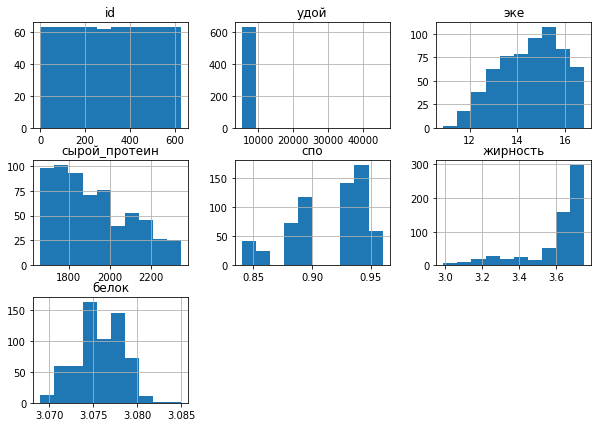

In [10]:
def func1(df):
    display(df.describe().T)
    df.hist(figsize=(10, 7))
    
func1(data_main)

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


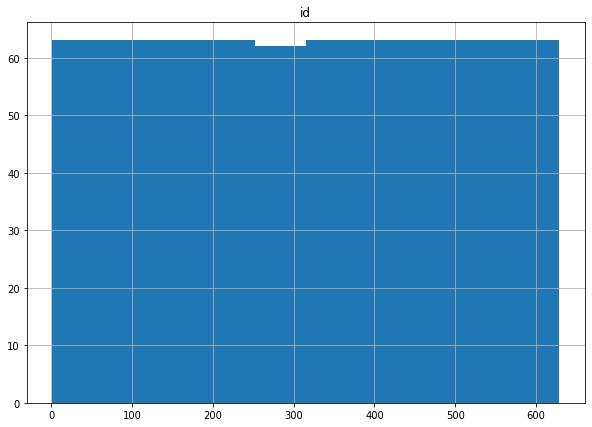

In [11]:
func1(data_dad)

,count,mean,std,min,25%,50%,75%,max
текущая_жирность,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
текущий_уровень_белок,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


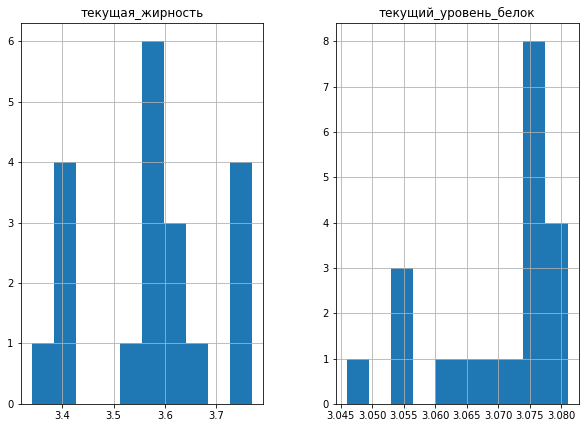

In [12]:
func1(data_cow_buy)

микровывод 1: что то не так с признаком 'удой', скорее всего там какой то выброс, проверим и если что уберем)

Text(0, 0.5, 'Масса молока, которую корова даёт в год (в килограммах)')

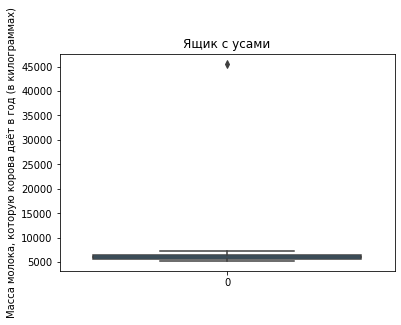

In [13]:
sns.boxplot(data = data_main['удой'])
plt.title('Ящик с усами')
plt.ylabel('Масса молока, которую корова даёт в год (в килограммах)')

Text(0.5, 1.0, 'Ящик с усами')

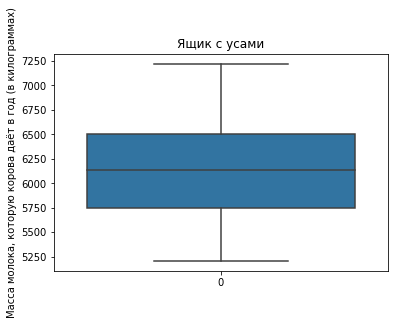

In [14]:
data_main = data_main[data_main['удой'] != 45616] 
sns.boxplot(data = data_main['удой'])
plt.ylabel('Масса молока, которую корова даёт в год (в килограммах)')
plt.title('Ящик с усами')

Избавились от выброса в данном признаке, теперь еще раз посмотрим его распределение

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64


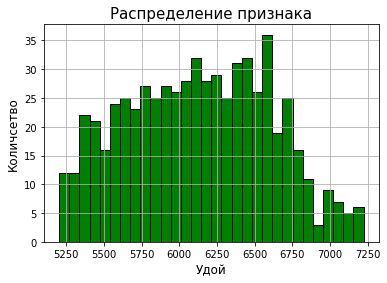

In [15]:
data_main['удой'].hist(color='green', bins=30, edgecolor = 'black')
plt.title('Распределение признака', fontsize=15)
plt.xlabel('Удой', fontsize=12)
plt.ylabel('Количсетво',fontsize=12)
print(data_main['удой'].describe())

Теперь распределение выглядит лучше и уже больше похоже на правду, сейчас агалогично построим и для других признаков

#### 2. Построим графики для каждого признака

In [16]:
def func2(name):
    sns.boxplot(data = data_main[name])
    plt.ylabel(name)
    plt.title('Ящик с усами')
    
def func3(name):
    data_main[name].hist(color='green', bins=60, edgecolor = 'black')
    plt.title('Распределение признака', fontsize=15)
    plt.xlabel(name, fontsize=12)
    plt.ylabel('Количеcтво',fontsize=12)
    print(data_main[name].describe())

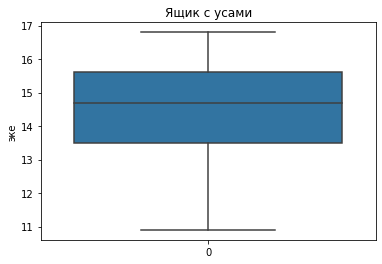

In [17]:
func2('эке')

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64


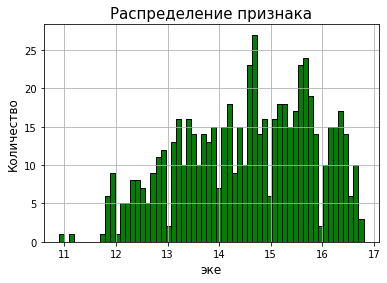

In [18]:
func3('эке')

<div class="alert alert-info">
распределение нормальное ассиметричное)
</div>

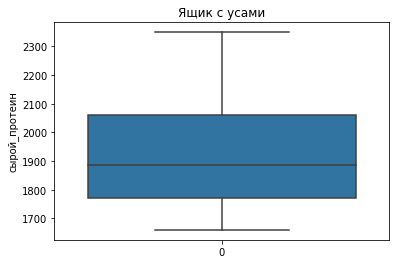

In [19]:
func2('сырой_протеин')

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин, dtype: float64


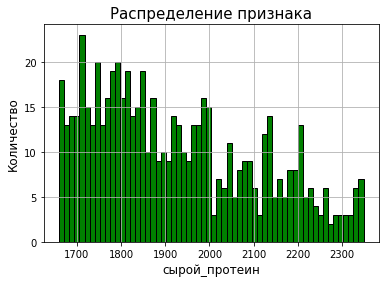

In [20]:
func3('сырой_протеин')

<div class="alert alert-info">
выообще какое то странное распределение, точно не нормальное) какой то вяленький пуассон)
</div>

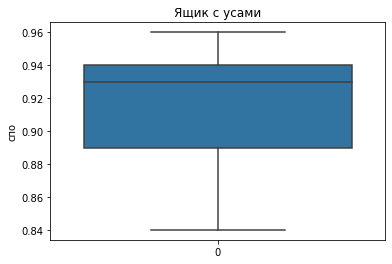

In [21]:
func2('спо')

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64


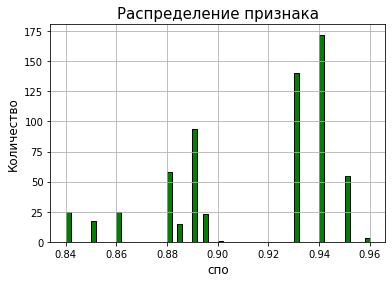

In [22]:
func3('спо')

<div class="alert alert-info">
бимодальное нормальное распределение) будто ассиметрия есть)
</div>

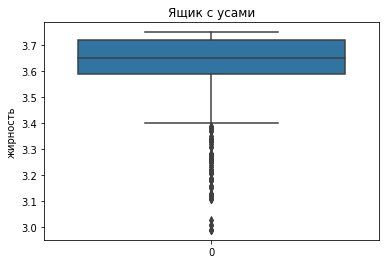

In [23]:
func2('жирность')

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64


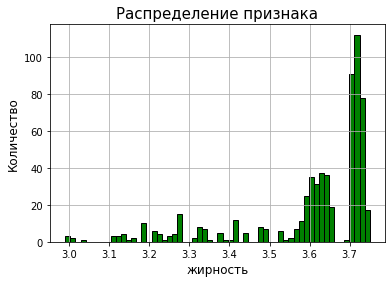

In [24]:
func3('жирность')

<div class="alert alert-info">
ассиметричное нормальное распределение)
</div>

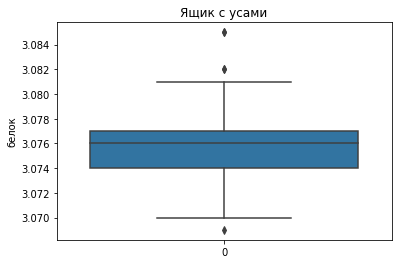

In [25]:
func2('белок')

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64


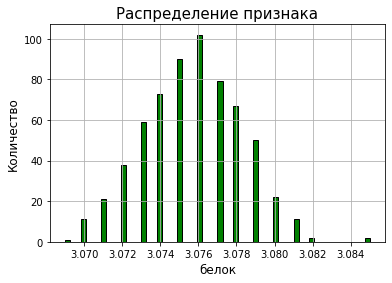

In [26]:
func3('белок')

<div class="alert alert-info">
нормальное распределение)
</div>

По графикам видно что у признаков 'жирность' и 'белок' тоже есть выбросы.
Посмотрим какой процент выбросы составляют в каждом из этих признаков >>> 

In [27]:
print(f'Процент выбросов в признаке "жирность": {(len(data_main[data_main["жирность"] < 3.4]) / len(data_main) * 100)}%')
print(f'Процент выбросов в признаке "белок": {(len(data_main.query("белок > 3.080 | белок < 3.070")) / len(data_main) * 100)}%')

Процент выбросов в признаке "жирность": 13.694267515923567%
Процент выбросов в признаке "белок": 2.547770700636943%


Так как в первом случае процент выбросов больше 5%, то выбросы не трогаем, во втором случае так как 5>2, убираем выбросы >>>

<div class="alert alert-info">
Большинство данных распределено нормально кроме одного признака
</div>

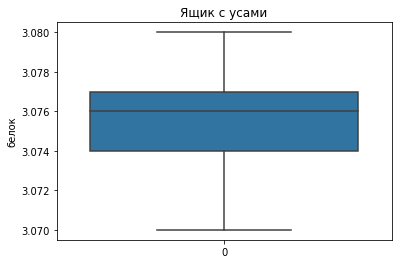

In [28]:
data_main = data_main.query("3.069 < белок < 3.081")
func2('белок')

count    612.000000
mean       3.075534
std        0.002379
min        3.070000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.080000
Name: белок, dtype: float64


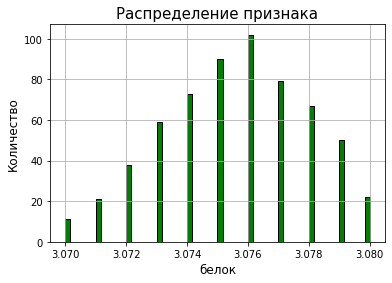

In [29]:
func3('белок')

<div class="alert alert-info">
нормальное распределение)
</div>

Text(0.5, 1.0, 'Ящик с усами')

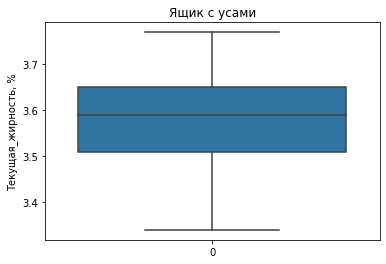

In [30]:
sns.boxplot(data = data_cow_buy['текущая_жирность'])
plt.ylabel('Текущая_жирность, %')
plt.title('Ящик с усами')

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: текущая_жирность, dtype: float64


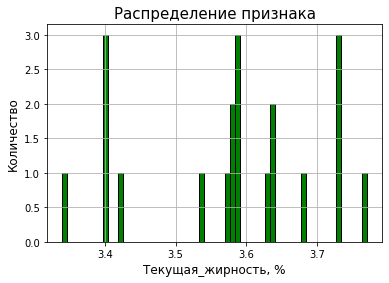

In [31]:
data_cow_buy['текущая_жирность'].hist(color='green', bins=60, edgecolor = 'black')
plt.title('Распределение признака', fontsize=15)
plt.xlabel('Текущая_жирность, %', fontsize=12)
plt.ylabel('Количеcтво',fontsize=12)
print(data_cow_buy['текущая_жирность'].describe())

<div class="alert alert-info">
непонятно точно какое это распределение, мало данных
</div>

Text(0.5, 1.0, 'Ящик с усами')

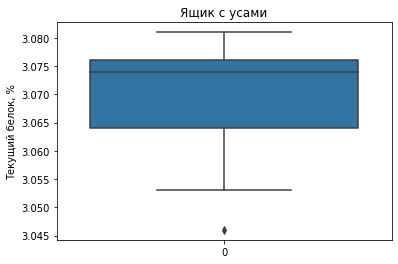

In [32]:
sns.boxplot(data = data_cow_buy['текущий_уровень_белок'])
plt.ylabel('Текущий белок, %')
plt.title('Ящик с усами')

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок, dtype: float64


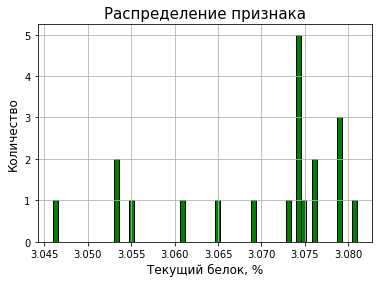

In [33]:
data_cow_buy['текущий_уровень_белок'].hist(color='green', bins=60, edgecolor = 'black')
plt.title('Распределение признака', fontsize=15)
plt.xlabel('Текущий белок, %', fontsize=12)
plt.ylabel('Количеcтво',fontsize=12)
print(data_cow_buy['текущий_уровень_белок'].describe())

<div class="alert alert-info">
непонятно точно какое это распределение, мало данных
</div>

Настало время категориальных признаков >>> 

In [34]:
def func4(name):
    print(data_main[name].value_counts())
    fig, ax = plt.subplots()
    ax.pie(data_main[name].value_counts(), labels=data_main[name].unique(), autopct='%.2f%%')
    plt.title(f'Распределение признака {name}')

Вис Бик Айдиал     358
РефлешнСоверинг    254
Name: порода, dtype: int64


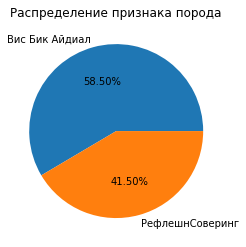

In [35]:
func4('порода')

более_2_лет    506
менее_2_лет    106
Name: возраст, dtype: int64


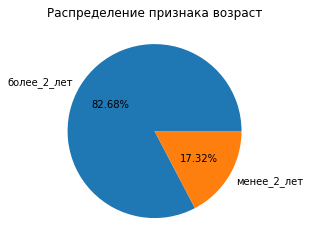

In [36]:
func4('возраст')

вкусно       357
не вкусно    255
Name: вкус_молока, dtype: int64


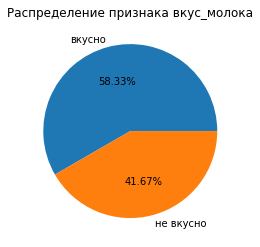

In [37]:
func4('вкус_молока')

Айдиал     310
Соверин    302
Name: порода_папы_быка, dtype: int64


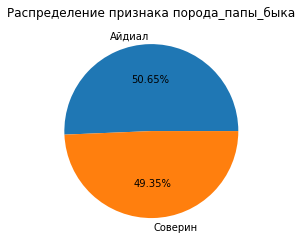

In [38]:
func4('порода_папы_быка')

Холмистое    341
Равнинное    271
Name: тип_пастбища, dtype: int64


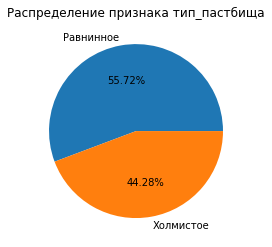

In [39]:
func4('тип_пастбища')

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: имя_папы, dtype: int64


Text(0.5, 1.0, 'Распределение признака Имя папы коровы')

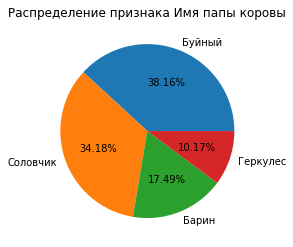

In [40]:
print(data_dad['имя_папы'].value_counts())
fig, ax = plt.subplots()
ax.pie(data_dad['имя_папы'].value_counts(), labels=data_dad['имя_папы'].unique(), autopct='%.2f%%')
plt.title(f'Распределение признака Имя папы коровы')

#### 3. Выводы о данных

По получившимся распределениям количественных признаков и диаграммам категориальных признаков можно сделать следующие выводы:

1) В среднем для того чтобы одна корова давала около 6127 кг молока в год, со средним содержанием белка в молоке - 3.076%, и жирностью - 3.65% >>> показатель питательности корма коровы должен состовлять(ЭКЕ) - 14.70, при этом содержание сырого протеина в корме должно быть - 1900 г., СПО находиться около значения 0.94.

2) Больше всего коров породы Вис Бик Айдиал, им более_2_лет, больше коров со вкусным молоком нежели наоборот, породы пап быков распределены одинаково, а пасуться коровы чаще на Холмистом типе пастбища. Папой большего количества коров является бык Буйный.

3) Заметили выбросы в некоторых признаков и удалили их там где надо, почти все распределения выглядели адекватно(чаще всего распределения были или нормальные или асимметричные), никаких значительных изменений вносить не надо. Данные в таблице data_cow_buy не трогали потому что их и так мало


## Корреляционный анализ

Работаем на этом этапе только с файлом ferma_main.csv

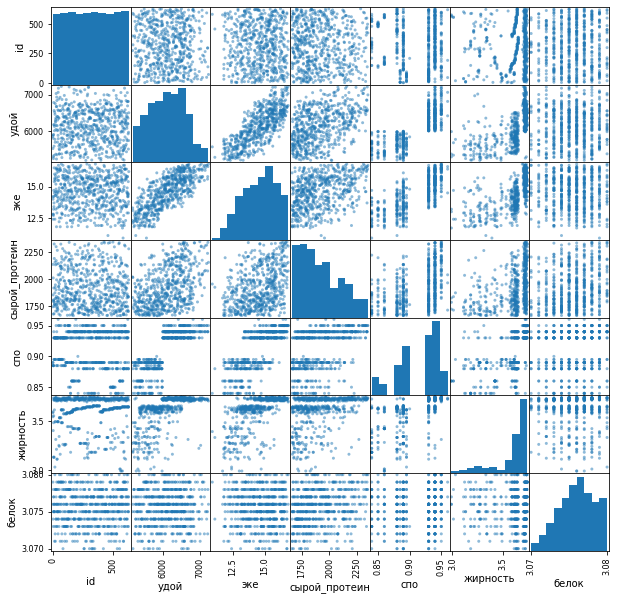

In [41]:
pd.plotting.scatter_matrix(data_main, figsize=(10, 10))
plt.show()

In [42]:
corr = data_main.corr(method='spearman')
corr.style.background_gradient(cmap='inferno' )

,id,удой,эке,сырой_протеин,спо,жирность,белок
id,1.000000,-0.002463,-0.020857,-0.037544,-0.017009,0.041676,0.010667
удой,-0.002463,1.000000,0.765676,0.434114,0.789203,0.688723,0.001992
эке,-0.020857,0.765676,1.000000,0.379207,0.742125,0.686479,-0.024679
сырой_протеин,-0.037544,0.434114,0.379207,1.000000,0.486617,0.392432,0.220975
спо,-0.017009,0.789203,0.742125,0.486617,1.000000,0.697501,0.113544
жирность,0.041676,0.688723,0.686479,0.392432,0.697501,1.000000,0.047074
белок,0.010667,0.001992,-0.024679,0.220975,0.113544,0.047074,1.000000


<AxesSubplot:>

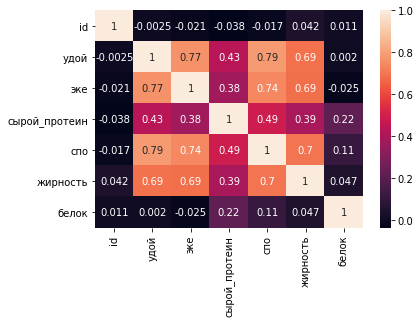

In [43]:
sns.heatmap(data_main.corr(method='spearman'), annot=True)

Итак, по корреляционной матрице и диаграммам рассеяния можно сделать выводы о взаимосвязи признака УДОЙ с остальными >>>

1) Удой и ЭКЕ - коэффициент корреляции = 0.77 => сильная корреляция, признаки сильно взаимосвязаны

2) Удой и Сырой протеин - коэффициент корреляции = 0.43 => умеренная корреляция, признаки умеренно взаимосвязаны

3) Удой и СПО - коэффициент корреляции = 0.79 => сильная корреляция, признаки сильно взаимосвязаны

4) Удой и Жирность - коэффициент корреляции = 0.69 => заметная корреляция, признаки заметно взаимосвязаны

5) Удой и Белок - коэффициент корреляции = 0.002 => практически отсутствующая корреляция, признаки практически не взаимосвязаны

Следует что для целевого признака Удой, наиболее важными будут являться признаки: ЭКЕ, СПО, Жирность

Теперь посторим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков

In [44]:
def func5(name1, name2):
    sns.scatterplot(data=data_main, x=name1, y='удой', hue=name2)
    plt.grid()
    plt.title('Диаграмма Рассеяния')
    plt.show()

#### Удой - ЭКЕ 

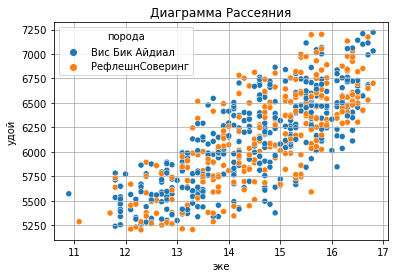

In [45]:
func5('эке', 'порода')

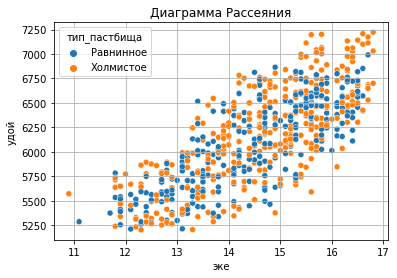

In [46]:
func5('эке', 'тип_пастбища')

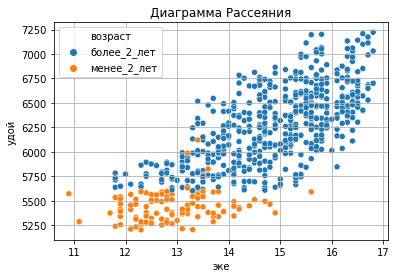

In [47]:
func5('эке', 'возраст')

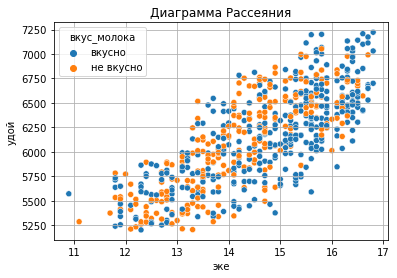

In [48]:
func5('эке', 'вкус_молока')

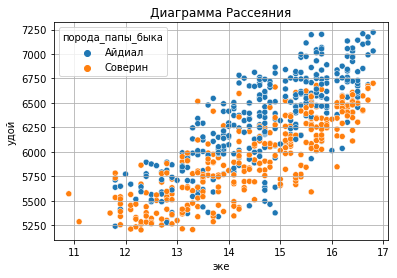

In [49]:
func5('эке', 'порода_папы_быка')

#### Удой - Сырой протеин

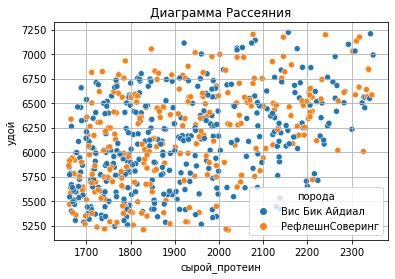

In [50]:
func5('сырой_протеин', 'порода')

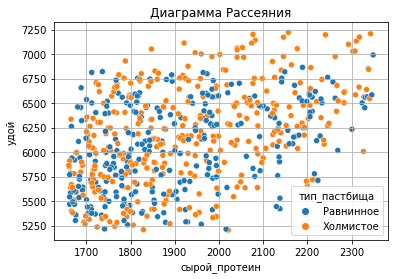

In [51]:
func5('сырой_протеин', 'тип_пастбища')

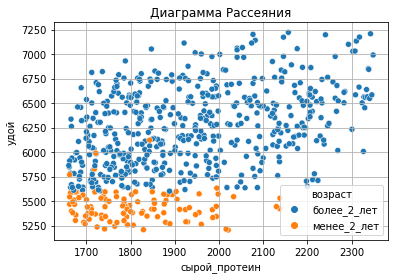

In [52]:
func5('сырой_протеин', 'возраст')

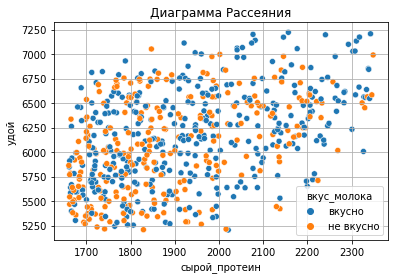

In [53]:
func5('сырой_протеин', 'вкус_молока')

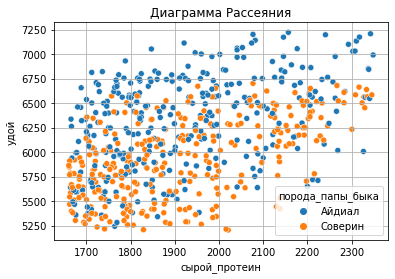

In [54]:
func5('сырой_протеин', 'порода_папы_быка')

#### Удой и СПО

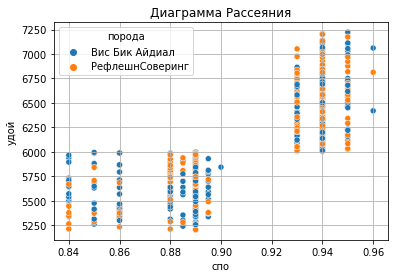

In [55]:
func5('спо', 'порода')

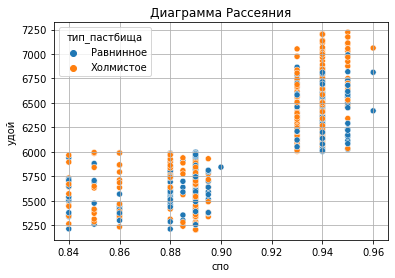

In [56]:
func5('спо', 'тип_пастбища')

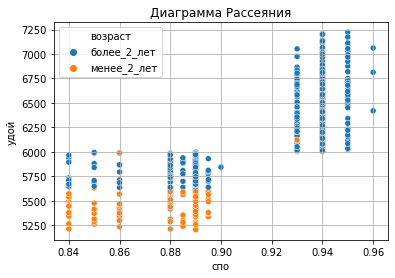

In [57]:
func5('спо', 'возраст')

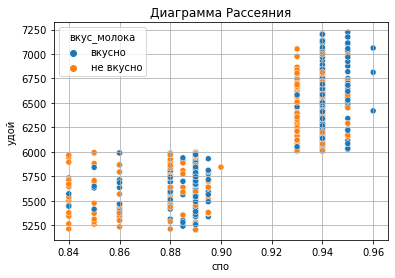

In [58]:
func5('спо', 'вкус_молока')

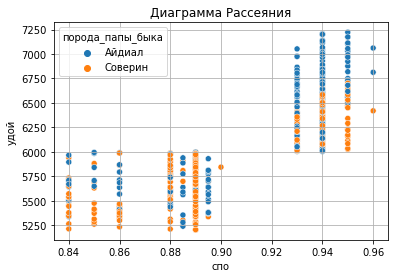

In [59]:
func5('спо', 'порода_папы_быка')

#### Удой и Жирность

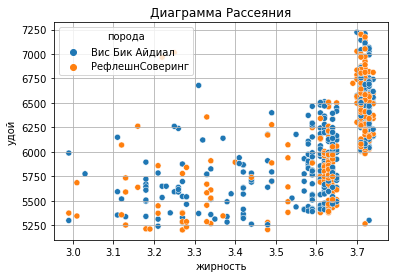

In [60]:
func5('жирность', 'порода')

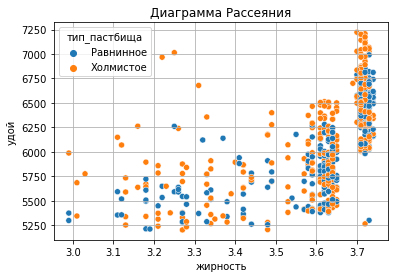

In [61]:
func5('жирность', 'тип_пастбища')

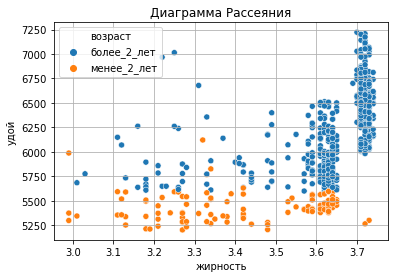

In [62]:
func5('жирность', 'возраст')

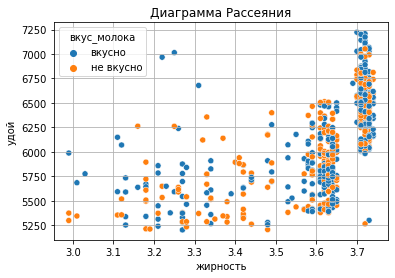

In [63]:
func5('жирность', 'вкус_молока')

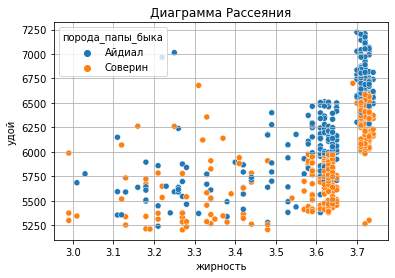

In [64]:
func5('жирность', 'порода_папы_быка')

#### Удой и Белок 

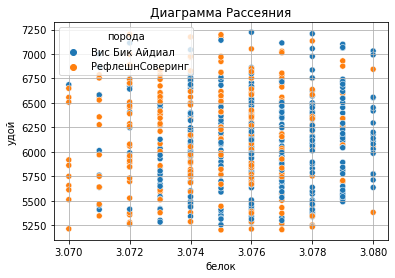

In [65]:
func5('белок', 'порода')

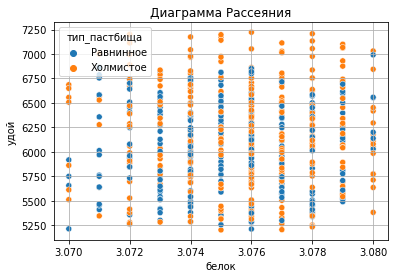

In [66]:
func5('белок', 'тип_пастбища')

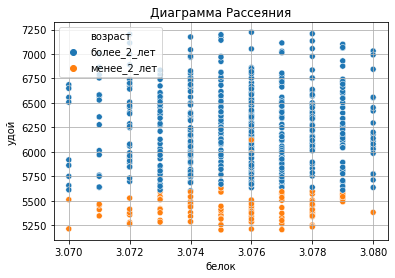

In [67]:
func5('белок', 'возраст')

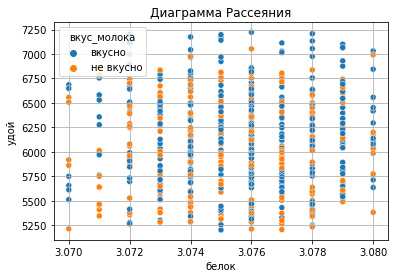

In [68]:
func5('белок', 'вкус_молока')

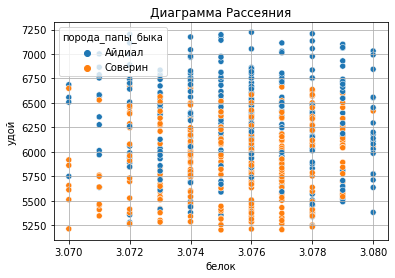

In [69]:
func5('белок', 'порода_папы_быка')

### Выводы о взаимосвязи признаков

1) Какой тип взаимосвязи между целевым и входными признаками?

- между входными и целевым признаками в основном линейная связь, однако нелинейная связь тоже есть(ЭКЕ - Удой, СПО - УДОЙ).

Также по полученным графикам можно увидеть сильную взаимосвязь у Удой и возраст, среднюю у Удой и порода папы быка, и слабую между Удой и породой/тип пастбища, почти отсутствует взаимосвязь у Удой и вкус.

Из количественных признаков для целевого признака Удой, наиболее важными будут являться признаки: ЭКЕ, СПО, Жирность, так как корреляция с ними самая высокая.


2) Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть? - Да, есть, возможно понадобиться преобразовать данный признак  признаки. Добавление новых признаков не требуется.

3) Наблюдается ли мультиколлинеарность между входными признаками? - Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю, таковых не имеется.

## Обучение модели линейной регрессии

### Шаг 1 - Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression.

В качестве входных признаков выберем те, с которым большая корреляция.

Для начала выделим признаки которые точно не следует брать во входную выборку => Это - белок и жирность так как они не влияют на количество удоя в год, еще не будем брать id по понятным причинам)

ТО ЕСТЬ во входную выборку войдут преимущественно те признаки которые связаны либо с кормом, либо с содержанием коров, либо сильно коррелируют с целевым признаком - эке, сырой протеин, cпо, порода, тип пастбища, порода папы быка, возраст.

In [70]:
# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Разобьем признаки не целевой и входные
X = data_main.drop(['удой', 'id', 'белок', 'жирность'], axis=1)
y = data_main['удой']
# display(X)
# print(y)

# Разобьем на обучающую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Масштабируйте количественные признаки с помощью StandardScaler.
scaler = StandardScaler()
num_col_names = ['эке', 'сырой_протеин', 'спо']

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

print(X_train.head())

   x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_менее_2_лет       эке  \
0                 0.0           0.0         0.0             0.0 -0.352845   
1                 0.0           0.0         0.0             0.0  0.875256   
2                 0.0           1.0         0.0             0.0  0.952012   
3                 0.0           0.0         1.0             0.0  0.798500   
4                 1.0           0.0         1.0             0.0 -0.813383   

   сырой_протеин       спо  
0       0.346413  0.522312  
1       0.346413  0.831855  
2       0.799027  0.522312  
3       0.929903  0.831855  
4      -1.087772 -1.025403  


Обучим модель линейной регрессии на подготовленных данных.

In [71]:
model_lr1 = LinearRegression()
model_lr1.fit(X_train, y_train)
predictions_lr1 = model_lr1.predict(X_test)

In [72]:
r2_lr1 = r2_score(y_test, predictions_lr1)
print('R² = ', r2_lr1)

R² =  0.7953683335703938


Анализ остатков

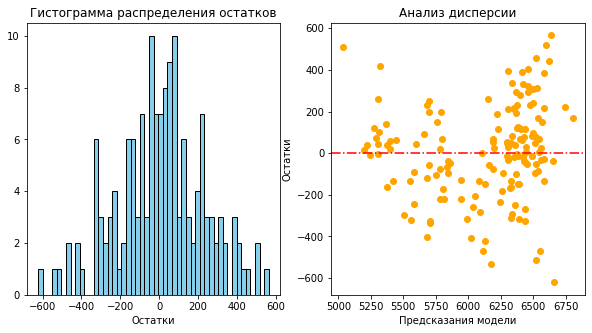

In [73]:
residuals1 = y_test - predictions_lr1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals1, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_lr1, residuals1, color='orange')
axes[1].axhline(y=0, color='r', linestyle='-.')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод к 1/3 модели простой линейной регрессии

значение R² модели - 0.7953683335703938

выводы, которые следуют из анализа остатков - График представляет собой асимметричное нормальное распределение со смещением влево => модель завышает прогнозные значения. Остатки на диаграмме показывают, что модель может работать неустойчиво, поскольку разброс остатков непостоянен.

нужны ли дополнительные исследования? - так как модель чаще или сильнее ошибается, предсказывая удой в интервале 5750 - 6250, разумно получить доп информацию про коров удой которых находится в интервале этих значений 

### Шаг 2 -  Подготовим данные с учётом связи входных признаков с целевым и обучим на них вторую модель LinearRegression.

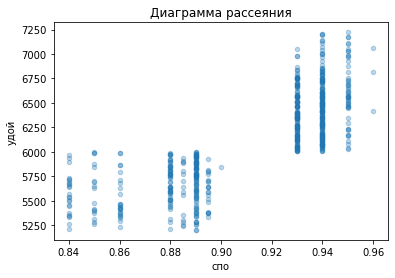

In [74]:
data_main.plot(kind='scatter', x='спо', y='удой', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

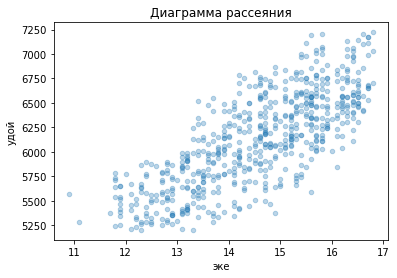

In [75]:
data_main.plot(kind='scatter', x='эке', y='удой', alpha=0.3, title='Диаграмма рассеяния')
plt.show()

Обнаружили, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу. Граница проходит в интервале от 0.9 до 0.93.

Обнаружили, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
Займемся этим ниже >>> 

In [76]:
data_main_copy = data_main

# преобразуем СПО в категориальный бинарный признак, использовав эту границу.
data_main_copy['кат_спо'] = data_main_copy['спо'].apply(lambda x: 1 if x > 0.91  else 0)

# введем новый признак ЭКЕ в квадрате
data_main_copy['эке_кв'] = data_main_copy['эке'] ** 2

#### Повторим шаги из пункта 1 и создадим вторую модель

In [77]:
X1 = data_main_copy.drop(['удой', 'id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
y1 = data_main_copy['удой']

# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Разобьем на обучающую и тренировочную выборки
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = RANDOM_STATE)

# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder1 = OneHotEncoder(drop='first', sparse=False)
cat_col_names1 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

X_train_ohe1 = encoder1.fit_transform(X_train1[cat_col_names1])
X_test_ohe1 = encoder1.transform(X_test1[cat_col_names1])

encoder_col_names1 = encoder1.get_feature_names()

# Масштабируйте количественные признаки с помощью StandardScaler.
scaler1 = StandardScaler()
num_col_names1 = ['эке_кв', 'сырой_протеин', 'кат_спо']

X_train_scaled1 = scaler1.fit_transform(X_train1[num_col_names1])
X_test_scaled1 = scaler1.transform(X_test1[num_col_names1])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe1 = pd.DataFrame(X_train_ohe1, columns=encoder_col_names1)
X_test_ohe1 = pd.DataFrame(X_test_ohe1, columns=encoder_col_names1)

X_train_scaled1 = pd.DataFrame(X_train_scaled1, columns = num_col_names1)
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns = num_col_names1)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train1 = pd.concat([X_train_ohe1, X_train_scaled1], axis=1)
X_test1 = pd.concat([X_test_ohe1, X_test_scaled1], axis=1)

print(X_train1.head())


   x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_менее_2_лет    эке_кв  \
0                 0.0           0.0         0.0             0.0 -0.396784   
1                 0.0           0.0         0.0             0.0  0.875308   
2                 0.0           1.0         0.0             0.0  0.959350   
3                 0.0           0.0         1.0             0.0  0.791801   
4                 1.0           0.0         1.0             0.0 -0.838601   

   сырой_протеин   кат_спо  
0       0.346413  0.844208  
1       0.346413  0.844208  
2       0.799027  0.844208  
3       0.929903  0.844208  
4      -1.087772 -1.184543  


In [78]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train1, y_train1)
predictions_lr2 = model_lr2.predict(X_test1)

In [79]:
r2_lr2 = r2_score(y_test1, predictions_lr2)
print('R² = ', r2_lr2)

R² =  0.8316394873761661


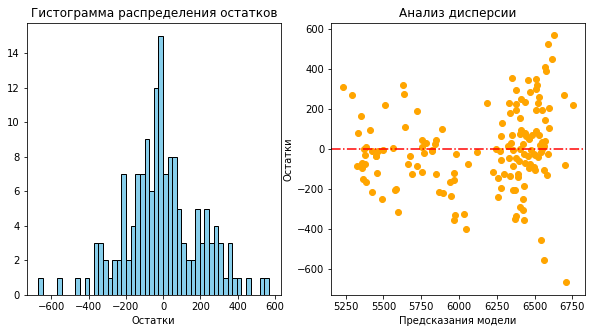

In [80]:
residuals2 = y_test1 - predictions_lr2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals2, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_lr2, residuals2, color='orange')
axes[1].axhline(y=0, color='r', linestyle='-.')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод к 2/3 модели простой линейной регрессии

значение R² модели - 0.8332519251903154

выводы, которые следуют из анализа остатков - График представляет собой симметричное почти нормальное распределение => 
Сумма остатков прогнозной модели близка к минимальному — модель работает лучше предыдущей! Однако, остатки на диаграмме показывают, что модель может работать неустойчиво, поскольку разброс остатков непостоянен. 

Можно сделать вывод, что уменьшение нелинейности между входными признаками и целевым повлияло на модель в лучшую сторону.

нужны ли дополнительные исследования? - так как остатки на диаграмме показывают, что модель может работать неустойчиво, то нужны дополнительные исследования. => добавим новый признак и избавимся от нелинейности признаков

### Шаг 3 -  Добавим в данные новый признак и обучим на них третью модель LinearRegression.

In [81]:
data_main_merge = data_main.merge(data_dad, on='id')
display(data_main_merge)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,кат_спо,эке_кв,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16,Буйный
608,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41,Барин
609,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36,Барин
610,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.44,Барин


In [82]:
X2 = data_main_merge.drop(['удой', 'id', 'белок', 'жирность', 'эке', 'спо'], axis=1)
y2 = data_main_merge['удой']

# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Разобьем на обучающую и тренировочную выборки
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = RANDOM_STATE)

X_train3 = pd.concat([X_train2, X_test2], ignore_index = True)
y_train3 = pd.concat([y_train2, y_test2], ignore_index = True)

# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder2 = OneHotEncoder(drop='first', sparse=False)
cat_col_names2 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']

X_train_ohe2 = encoder2.fit_transform(X_train2[cat_col_names2])
X_test_ohe2 = encoder2.transform(X_test2[cat_col_names2])

encoder_col_names2 = encoder2.get_feature_names()

# Масштабируйте количественные признаки с помощью StandardScaler.
scaler2 = StandardScaler()
num_col_names2 = ['эке_кв', 'сырой_протеин', 'кат_спо']

X_train_scaled2 = scaler2.fit_transform(X_train2[num_col_names2])
X_test_scaled2 = scaler2.transform(X_test2[num_col_names2])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns=encoder_col_names2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names2)

X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns = num_col_names2)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns = num_col_names2)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train2 = pd.concat([X_train_ohe2, X_train_scaled2], axis=1)
X_test2 = pd.concat([X_test_ohe2, X_test_scaled2], axis=1)

print(X_train2.head())

   x0_РефлешнСоверинг  x1_Холмистое  x2_Соверин  x3_менее_2_лет  x4_Буйный  \
0                 0.0           0.0         0.0             0.0        1.0   
1                 0.0           0.0         0.0             0.0        1.0   
2                 0.0           1.0         0.0             0.0        1.0   
3                 0.0           0.0         1.0             0.0        0.0   
4                 1.0           0.0         1.0             0.0        0.0   

   x4_Геркулес  x4_Соловчик    эке_кв  сырой_протеин   кат_спо  
0          0.0          0.0 -0.396784       0.346413  0.844208  
1          0.0          0.0  0.875308       0.346413  0.844208  
2          0.0          0.0  0.959350       0.799027  0.844208  
3          0.0          1.0  0.791801       0.929903  0.844208  
4          0.0          0.0 -0.838601      -1.087772 -1.184543  


In [83]:
model_lr3 = LinearRegression()
model_lr3.fit(X_train2, y_train2)
predictions_lr3 = model_lr3.predict(X_test2)

In [84]:
r2_lr3 = r2_score(y_test2, predictions_lr3)
print('R² = ', r2_lr3)

R² =  0.8457081491943992


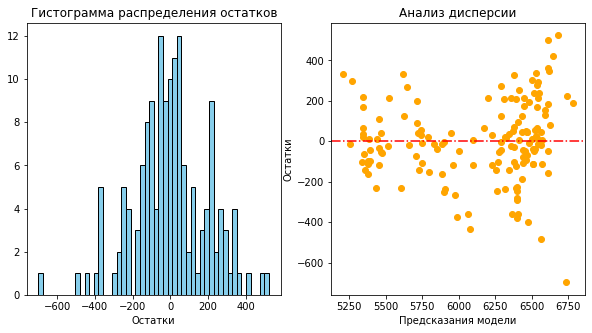

In [85]:
residuals3 = y_test2 - predictions_lr3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals3, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_lr3, residuals3, color='orange')
axes[1].axhline(y=0, color='r', linestyle='-.')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод к 3/3 модели простой линейной регрессии

значение R² модели - 0.8467677260231983 - Наилучший результат.

выводы, которые следуют из анализа остатков - График представляет собой  нормальное распределение незначительно смещенное влево => однако модель стала работать точнее. По дисперсии можно сделать вывод, что модель работает лучше первой и чуть лучше второй! 

И наконец то можно сказать, что третья модель - самая точная. Следовательно, уменьшение нелинейности между входными признаками и целевым, а также добавление в расчет еще одного входного признака повлияло благоприятно повлияла на прогнозирование модели.

нужны ли дополнительные исследования? - нет

 сравним остатки и r2 всех модедей >>>

In [86]:
print('значение R² 1/3 модели: ', r2_lr1)
print('значение R² 2/3 модели: ', r2_lr2)
print('значение R² 3/3 модели: ', r2_lr3)

print('Среднее значение остатков 1/3 модели: ', residuals1.mean())
print('Среднее значение остатков 2/3 модели: ', residuals2.mean())
print('Среднее значение остатков 3/3 модели: ', residuals3.mean())

значение R² 1/3 модели:  0.7953683335703938
значение R² 2/3 модели:  0.8316394873761661
значение R² 3/3 модели:  0.8457081491943992
Среднее значение остатков 1/3 модели:  7.328876202898892
Среднее значение остатков 2/3 модели:  -3.3156989392655483
Среднее значение остатков 3/3 модели:  0.969883985662634


Лучший R² у третьей модели - 0.8467677260231983(точность 84%), Минимальное среднее значение остатков(-0.24408592228173445) у первой модели. Так и живем)

#### Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [87]:
from math import sqrt
def metrics(true, pred):
    print('mae = ', mean_absolute_error(true, pred))
    print('mse = ', mean_squared_error(true, pred))
    print('rmse = ', sqrt(mean_squared_error(true, pred)))

In [88]:
print('Для 1 модели')
metrics(y_test, predictions_lr1)

Для 1 модели
mae =  174.40827799480968
mse =  50703.42332113209
rmse =  225.1742066070892


In [89]:
print('Для 2 модели')
metrics(y_test1, predictions_lr2)

Для 2 модели
mae =  153.95536025885966
mse =  41716.19422874425
rmse =  204.24542645734874


In [90]:
print('Для 3 модели')
metrics(y_test2, predictions_lr3)

Для 3 модели
mae =  147.07797995157955
mse =  38230.27570900672
rmse =  195.52563951821438


In [91]:
# Доверительный интервал 
print(st.norm.interval(confidence=0.95, loc=np.mean(predictions_lr3), scale=st.sem(predictions_lr3)))

(6068.076877421743, 6208.754596436998)


Лучшая модель - модель3 с самыми маленькими значениями метрик, и с доверительным интервалом = (6070.497027590764, 6211.5065511559)

#### С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить

In [92]:
data_cow_buy_copy = data_cow_buy.copy(deep = True)
data_cow_buy['эке'] = data_main['эке'].mean() * 1.05
data_cow_buy['сырой_протеин'] = data_main['сырой_протеин'].mean() * 1.05
data_cow_buy['спо'] = data_main['спо'].mean() * 1.05

# преобразуем СПО в категориальный бинарный признак, использовав эту границу.
data_cow_buy['кат_спо'] = data_cow_buy['спо'].apply(lambda x: 1 if x > 0.91  else 0)

# введем новый признак ЭКЕ в квадрате
data_cow_buy['эке_кв'] = data_cow_buy['эке'] ** 2

# display(data_cow_buy)

In [93]:
data_cow_buy_final = data_cow_buy.copy(deep=True)
data_cow_buy_final = data_cow_buy_final.drop(['эке', 'спо'], axis=1)

data_cow_buy = data_cow_buy.drop(['текущий_уровень_белок', 'эке', 'спо'], axis=1)
# display(data_cow_buy)
X_train = X_train3.drop('вкус_молока', axis =1)
X_train['тип_пастбища'] = X_train['тип_пастбища'].str.lower()
# display(X_train)

# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'кат_спо']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(data_cow_buy[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Масштабируйте количественные признаки с помощью StandardScaler.
scaler = StandardScaler()
num_col_names = ['эке_кв', 'сырой_протеин']

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(data_cow_buy[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# print(X_train.head())

In [94]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train3)
predictions_lr = model_lr.predict(X_test)
data_cow_buy_final['предсказанный_удой'] = predictions_lr
display(data_cow_buy_final)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,сырой_протеин,кат_спо,эке_кв,предсказанный_удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2018.417402,1,233.208082,6585.641346
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2018.417402,1,233.208082,6320.676172
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2018.417402,1,233.208082,6301.518912
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2018.417402,1,233.208082,6595.337736
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2018.417402,1,233.208082,6544.891412
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,2018.417402,1,233.208082,6369.204309
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2018.417402,1,233.208082,6585.641346
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2018.417402,1,233.208082,6541.956098
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2018.417402,1,233.208082,6301.518912
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2018.417402,1,233.208082,6374.057809


### Вывод 5

На данном этапе были созданы три модлеи линейной регрессии, среди них была выявлена модель с наилучшими метриками и точностью 

 - 3 модель
 
mae =  146.4625952324208

mse =  37967.73485485037

rmse =  194.85311097041887

с доверительным интервыалом - (6070.497027590764, 6211.5065511559)

Также были получены предсказания количества удоя для всей выборки коров на продажу. Каждая из коров предположительно будет давать более 6000 кг удоя в год.

## Обучение модели логистической регрессии

### Шаг 1 Подготовим данные датасета ferma_main.csv и обучим на них модель LogisticRegression.

In [95]:
display(data_main)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,кат_спо,эке_кв
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.44


In [96]:
data_log = data_main.drop(['id', 'удой', 'вкус_молока', 'эке', 'спо', 'порода', 'порода_папы_быка'], axis =1)
data_log['кат_вкус_молока'] = data_main['вкус_молока'].apply(lambda x: 0 if x == 'вкусно' else 1)
display(data_log)

,сырой_протеин,тип_пастбища,жирность,белок,возраст,кат_спо,эке_кв,кат_вкус_молока
0,1743,Равнинное,3.58,3.076,более_2_лет,0,201.64,0
1,2138,Равнинное,3.54,3.079,менее_2_лет,0,163.84,0
2,1854,Холмистое,3.59,3.074,более_2_лет,0,196.00,1
3,2012,Холмистое,3.40,3.075,более_2_лет,0,153.76,1
4,1675,Равнинное,3.73,3.073,менее_2_лет,0,163.84,0
...,...,...,...,...,...,...,...,...
624,1964,Равнинное,3.74,3.075,более_2_лет,1,237.16,1
625,1700,Равнинное,3.64,3.073,менее_2_лет,0,166.41,0
626,1837,Холмистое,3.64,3.075,более_2_лет,0,207.36,1
627,1994,Равнинное,3.64,3.077,более_2_лет,0,190.44,0


In [97]:
X = data_log.drop('кат_вкус_молока', axis = 1)
y = data_log['кат_вкус_молока']

# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Разобьем на обучающую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

X_train_new = pd.concat([X_train, X_test], ignore_index = True)
y_train_new = pd.concat([y_train, y_test], ignore_index = True)

# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['тип_пастбища', 'возраст', 'кат_спо']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Масштабируйте количественные признаки с помощью StandardScaler.
scaler = StandardScaler()
num_col_names = ['жирность', 'белок', 'эке_кв', 'сырой_протеин']

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

print(X_train.head())

   x0_Холмистое  x1_менее_2_лет  x2_1  жирность     белок    эке_кв  \
0           0.0             0.0   1.0  0.690082  0.194673 -0.396784   
1           0.0             0.0   1.0  0.690082 -1.483356  0.875308   
2           1.0             0.0   1.0 -0.152332  1.872702  0.959350   
3           0.0             0.0   1.0  0.690082  0.194673  0.791801   
4           0.0             0.0   0.0  0.028185  0.194673 -0.838601   

   сырой_протеин  
0       0.346413  
1       0.346413  
2       0.799027  
3       0.929903  
4      -1.087772  


Обучим модель логистической регрессии(LogisticRegression) >>> 

In [98]:
# создаём объект для работы с моделью
clf = LogisticRegression(random_state=RANDOM_STATE)

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ',round(acc ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.582
recall:  0.321
precision:  0.694


Построим матрицу ошибок(confusion_matrix)

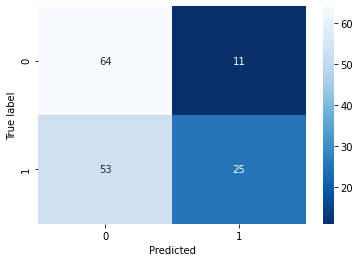

In [99]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

### Шаг 2 Проанализируем модель логистической регрессии

Итак, разберемся сначала чем у нас являются ошибки первого и второго рода, и какое их количество. По матрице ошибок видно, что количество ОШИБОК ПЕРВОГО РОДА - 11, а ОШИБОК ВТОРОГО РОДА - 53.

Из матрицы ошибок видно, что:

в 64 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (0 == 0);
в 53 случаях модель неправильно отнесла невкусное молоко к категории 'вкусно' (0 != 1);
в 11 случаях модель неправильно отнесла вкусное молоко к категории ' не вкусно' (1 != 0);
в 25 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно'(1 == 1);

Конечно же, ошибка второго рода критичнее, так как для заказчика самое главное — вкусное молоко. То что мы не предложим ему несколько коров со вкусным молоком менее значительней, нежели чем что среди предложенных коров будет некоторое количество с невкусным молоком.

Так как Recall сосредоточена на ошибках второго рода и никак не учитывает ошибки первого, то для нашего случая она значительнее чем Precision.

Precision оценивает точность, с которой модель присваивает объектам класс 1. Она реагирует на ошибки первого рода, однако не реагирует на ошибки второго. >>> Следовательно нам нужно увеличить Recall.

Изменим порог принадлежности к классам >>>>>

In [100]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 4,endpoint=False)]
print(thresholds) 

[0.5, 0.62, 0.75, 0.88]


In [101]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_valid   y_proba
37         1  0.746768
108        1  0.732301
16         1  0.729994
45         0  0.683963
65         1  0.681198


In [102]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.5  y_pred_0.62  y_pred_0.75  y_pred_0.88
74         0  0.544510           1            0            0            0
6          0  0.411417           0            0            0            0
98         1  0.511181           1            0            0            0
99         1  0.379930           0            0            0            0
147        1  0.412888           0            0            0            0


In [103]:
print('y_pred_0.5 Recall = ', recall_score(y_test, data['y_pred_0.5']))
print('y_pred_0.62 Recall = ', recall_score(data['y_valid'], data['y_pred_0.62']))
print('y_pred_0.75 Recall = ', recall_score(data['y_valid'], data['y_pred_0.75']))
print('y_pred_0.88 Recall = ', recall_score(data['y_valid'], data['y_pred_0.88']))

y_pred_0.5 Recall =  0.2564102564102564
y_pred_0.62 Recall =  0.1282051282051282
y_pred_0.75 Recall =  0.0
y_pred_0.88 Recall =  0.0


Сведем Recall к 1

In [104]:
thresholds = [round(i,2) for i in np.linspace(0.1,0.5,num = 4,endpoint=False)]
print(thresholds)

[0.1, 0.2, 0.3, 0.4]


In [105]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.2  y_pred_0.3  y_pred_0.4
140        0  0.311696           1           1           1           0
17         1  0.429628           1           1           1           1
6          0  0.411417           1           1           1           1
39         1  0.439970           1           1           1           1
71         1  0.544239           1           1           1           1


In [106]:
for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

y_pred_0.1 Recall =  1.0
y_pred_0.2 Recall =  0.9871794871794872
y_pred_0.3 Recall =  0.8717948717948718
y_pred_0.4 Recall =  0.5769230769230769


Подробнее расмотрим интересиующие нас пороги 

In [107]:
thresholds = [0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
print(thresholds)
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

[0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
     y_valid   y_proba  y_pred_0.21  y_pred_0.22  y_pred_0.23  y_pred_0.24  \
54         0  0.209139            0            0            0            0   
88         0  0.381142            1            1            1            1   
89         0  0.206942            0            0            0            0   
136        0  0.440921            1            1            1            1   
32         0  0.204938            0            0            0            0   

     y_pred_0.25  y_pred_0.26  y_pred_0.27  y_pred_0.28  y_pred_0.29  
54             0            0            0            0            0  
88             1            1            1            1            1  
89             0            0            0            0            0  
136            1            1            1            1            1  
32             0            0            0            0            0  
y_pred_0.21 Recall =  0.9871794871794872
y_pred_0.

Рассмотрим интервал 0.22 - 0.23

In [108]:
thresholds = [0.221, 0.222, 0.223, 0.224, 0.225, 0.226, 0.227, 0.228, 0.229]
print(thresholds)
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

for i in thresholds:
    print(f'y_pred_{i} Recall = ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

[0.221, 0.222, 0.223, 0.224, 0.225, 0.226, 0.227, 0.228, 0.229]
     y_valid   y_proba  y_pred_0.221  y_pred_0.222  y_pred_0.223  \
110        0  0.277515             1             1             1   
38         0  0.386721             1             1             1   
6          0  0.411417             1             1             1   
45         0  0.683963             1             1             1   
133        0  0.382336             1             1             1   

     y_pred_0.224  y_pred_0.225  y_pred_0.226  y_pred_0.227  y_pred_0.228  \
110             1             1             1             1             1   
38              1             1             1             1             1   
6               1             1             1             1             1   
45              1             1             1             1             1   
133             1             1             1             1             1   

     y_pred_0.229  
110             1  
38              1  
6   

Самое оптимальное значение порога — 0.221. Больше уже не нужно: дальше некуда уменьшать ошибки.

In [109]:
# получаем прогнозные метки классов
y_pred_fin = (clf.predict_proba(X_test)[:, 1] >= 0.221).astype(int) 

# проводим оценку точности
acc = accuracy_score(y_test, y_pred_fin)
recall = recall_score(y_test, y_pred_fin)
precision = precision_score(y_test, y_pred_fin)

print('accuracy: ',round(acc ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.588
recall:  0.974
precision:  0.555


ЕЕЕЕЕЕЕЕ хэппи ура, recall сведен к 0, время нарисовать матрицу ошибок

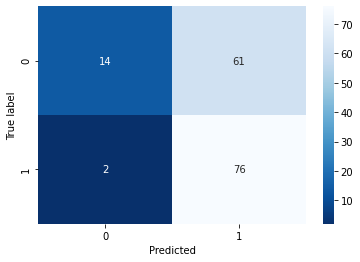

In [110]:
cm = confusion_matrix(y_test, y_pred_fin)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Ну теперь другое дело, в 0 случаях модель неправильно отнесла невкусное молоко к категории 'вкусно' (0 != 1) =>, мы не предложим фермеру корову дающую невкусное молоко.

### Шаг 3 Спрогнозируем вкус молока коров, которых фермер хочет купить

In [111]:
display(data_cow_buy_copy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [112]:
data_cow_buy_copy['эке'] = data_main['эке'].mean() * 1.05
data_cow_buy_copy['сырой_протеин'] = data_main['сырой_протеин'].mean() * 1.05
data_cow_buy_copy['спо'] = data_main['спо'].mean() * 1.05

# преобразуем СПО в категориальный бинарный признак, использовав эту границу.
data_cow_buy_copy['кат_спо'] = data_cow_buy_copy['спо'].apply(lambda x: 1 if x > 0.91  else 0)

# введем новый признак ЭКЕ в квадрате
data_cow_buy_copy['эке_кв'] = data_cow_buy_copy['эке'] ** 2

data_cow_buy_copy.rename(columns={'текущая_жирность': 'жирность', 'текущий_уровень_белок': 'белок'}, inplace=True)
data_cow_buy_copy = data_cow_buy_copy.drop(['имя_папы', 'эке', 'спо'], axis=1)

In [113]:
display(data_cow_buy_copy)
X_train_new['тип_пастбища'] = X_train_new['тип_пастбища'].str.lower()
display(X_train_new)

,порода,тип_пастбища,порода_папы_быка,жирность,белок,возраст,сырой_протеин,кат_спо,эке_кв
0,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,2018.417402,1,233.208082
1,Вис Бик Айдиал,равнинное,Соверин,3.54,3.081,менее_2_лет,2018.417402,1,233.208082
2,РефлешнСоверинг,равнинное,Соверин,3.59,3.074,более_2_лет,2018.417402,1,233.208082
3,РефлешнСоверинг,холмистое,Айдиал,3.40,3.061,более_2_лет,2018.417402,1,233.208082
4,РефлешнСоверинг,равнинное,Айдиал,3.64,3.074,более_2_лет,2018.417402,1,233.208082
5,РефлешнСоверинг,равнинное,Соверин,3.63,3.053,менее_2_лет,2018.417402,1,233.208082
6,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,2018.417402,1,233.208082
7,Вис Бик Айдиал,равнинное,Соверин,3.57,3.079,более_2_лет,2018.417402,1,233.208082
8,РефлешнСоверинг,равнинное,Соверин,3.59,3.074,более_2_лет,2018.417402,1,233.208082
9,РефлешнСоверинг,холмистое,Айдиал,3.40,3.079,менее_2_лет,2018.417402,1,233.208082


,сырой_протеин,тип_пастбища,жирность,белок,возраст,кат_спо,эке_кв
0,1984,равнинное,3.72,3.076,более_2_лет,1,198.81
1,1984,равнинное,3.72,3.072,более_2_лет,1,246.49
2,2067,холмистое,3.58,3.080,более_2_лет,1,249.64
3,2091,равнинное,3.72,3.076,более_2_лет,1,243.36
4,1721,равнинное,3.61,3.076,более_2_лет,0,182.25
...,...,...,...,...,...,...,...
607,1964,равнинное,3.72,3.077,более_2_лет,1,243.36
608,2093,равнинное,3.61,3.079,более_2_лет,0,182.25
609,1747,равнинное,3.73,3.076,более_2_лет,1,243.36
610,1684,равнинное,3.64,3.071,более_2_лет,0,182.25


In [114]:
# Кодируем категориальные признаки с помощью OneHotEncoder.
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['тип_пастбища', 'возраст', 'кат_спо']

X_train_ohe = encoder.fit_transform(X_train_new[cat_col_names])
X_test_ohe = encoder.transform(data_cow_buy_copy[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# Масштабируйте количественные признаки с помощью StandardScaler.
scaler = StandardScaler()
num_col_names = ['жирность', 'белок', 'эке_кв', 'сырой_протеин']

X_train_scaled = scaler.fit_transform(X_train_new[num_col_names])
X_test_scaled = scaler.transform(data_cow_buy_copy[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train_new = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_new = pd.concat([X_test_ohe, X_test_scaled], axis=1)

print(X_train_new.head())

   x0_холмистое  x1_менее_2_лет  x2_1  жирность     белок    эке_кв  \
0           0.0             0.0   1.0  0.687087  0.195902 -0.384195   
1           0.0             0.0   1.0  0.687087 -1.486794  0.885863   
2           1.0             0.0   1.0 -0.143701  1.878598  0.969770   
3           0.0             0.0   1.0  0.687087  0.195902  0.802489   
4           0.0             0.0   0.0  0.034325  0.195902 -0.825306   

   сырой_протеин  
0       0.338710  
1       0.338710  
2       0.794366  
3       0.926122  
4      -1.105116  


In [115]:
# обучаем модель на данных
clf = clf.fit(X_train_new, y_train_new)

Здесь я вручную повышала порог, до определенного значения, потому что исходя из полученного нами порога в 0.221 ни у одна из продаваемых коров не дает вкусное молоко. Повышала порог до первых 4 - х коров у которых теоретически вкусное молоко.

In [116]:
y_pred_new = (clf.predict_proba(X_test_new)[:, 1] >= 0.31).astype(int) 
print(y_pred_new)

[0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1]


## Итоговые выводы

In [117]:
data_cow_buy_final['предположительный_вкус_молока'] = y_pred_new
data_cow_buy_final['предположительный_вкус_молока'] = data_cow_buy_final['предположительный_вкус_молока'].apply(lambda x: 'вкусно' if x == 0 else 'не вкусно')
data_product = data_cow_buy_final.query('предположительный_вкус_молока == "вкусно"')
data_product = data_product.drop(['кат_спо', 'эке_кв', 'сырой_протеин'], axis=1)
display(data_product)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,предсказанный_удой,предположительный_вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6585.641346,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6585.641346,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6374.057809,вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6352.051796,вкусно


Прогноз вкуса молока коров - ПОЛУЧЕН! Также были добавлены прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер. Мы получили искомую таблицу с предсказанным удоем и предсказанным вкусом молока коров, которые мы будем рекомендовать фермеру на продажу.

Итак, подведем промежуточный итог, оказалось, по предсказаниям нашей модели мы можем рекомендовать на покупку фермеру 4 коров из всех 20 предложенных, так как вкус их молока предположительно вкусный и количсетво удоя предположительно будет составлять более 6300 кг в год. 

Также рекомендуем в дальнейшем больше присматриваться к коровам с породой Вис Бик Айдиал с типом пастбища холмистое, так как почти все рекомендованные коровы имеют данные качества.

Что касается моделей линейной регрессии и логистической регрессии >>>

- Способы улучшения качества регрессионной модели, которые были использованы:

1) Для линейной регрессии - уменьшение нелинейности между входными признаками и целевым, а также добавление в расчет еще одного входного признака.

2) Для логистической регрессии - уменьшали ошибку второго рода посредством приближения Recall к 1, также был подобран подходящий нам порог.

- Возможно ли ещё улучшить результаты регрессионной модели? - да возможно, например добавить новые признаки или увеличить обучающую выборку.

- Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов? - как выяснилось те которые связаны с ошибками первого и второго рода, то есть recall и precision, в нашем случае большую роль сыграл recall.

## Общий выводы

Подведем итоги, 

- Первым шагом была загрузка данных - 
Выгрузили и ознакомились с данными, для каждого датафрейма обнаружено следующее >>>

Первый датафрэйм(data_main)

1) Поменять название столбцов
2) Пропусков нет
3) Изменить тип с object64 на float64 у следующих признаков(Жирность, Белок, СПО, ЭКЕ)
4) Дубликаты - 5, удалим

Второй датафрэйм(data_dad)

1) Пропусков и дубликатов 0
2) Поменять название столбцов, с типами данных все хорошо

Третий датафрэйм(data_cow_buy)

1) Пропусков нет, дубликаты - 4(не трогаем потому что данных мало), исправить название столбцов
2) поменять тип столбцов Текущая_жирность,%, Текущий_уровень_белок,% на float64

- второй шаг - предобработка данных - На этом этапе были удалены дубликаты, данные преобразованы в нужные типы, переименованы столбцы, теперь данные точно в порядке и с ними можно работать)))

- третий шаг - исследовательский анализ - сделаны следующие выводы:

1) В среднем для того чтобы одна корова давала около 6127 кг молока в год, со средним содержанием белка в молоке - 3.076%, и жирностью - 3.65% >>> показатель питательности корма коровы должен состовлять(ЭКЕ) - 14.70, при этом содержание сырого протеина в корме должно быть - 1900 г., СПО находиться около значения 0.94.

2) Больше всего коров породы Вис Бик Айдиал, им более2лет, больше коров со вкусным молоком нежели наоборот, породы пап быков распределены одинаково, а пасуться коровы чаще на Холмистом типе пастбища. Папой большего количества коров является бык Буйный.

3) Заметили выбросы в некоторых признаков и удалили их там где надо, почти все распределения выглядели адекватно(чаще всего распределения были или нормальные или асимметричные), никаких значительных изменений вносить не надо. Данные в таблице data_cow_buy не трогали потому что их и так мало

- четвертый шаг - после корреляционного анализа определили следующее:

1) Тип взаимосвязи между целевым и входными признаками >>> 

между входными и целевым признаками в основном линейная связь, однако нелинейная связь тоже есть(ЭКЕ - Удой, СПО - УДОЙ).
Также по полученным графикам можно увидеть сильную взаимосвязь у Удой и возраст, среднюю у Удой и порода папы быка, и слабую между Удой и породой/тип пастбища, почти отсутствует взаимосвязь у Удой и вкус.

Из количественных признаков для целевого признака Удой, наиболее важными будут являться признаки: ЭКЕ, СПО, Жирность, так как корреляция с ними самая высокая.

2) Нелинейные связи обнаружены, возможно понадобиться преобразовать данный признак признаки. Добавление новых признаков не требуется.

3) Мультиколлинеарность между входными признаками не имеется.

- пятый шаг - созданы три модели линейной регрессии, среди них была выявлена модель с наилучшими метриками и точностью >>> 

3 модель

mae = 146.4625952324208

mse = 37967.73485485037

rmse = 194.85311097041887

с доверительным интервыалом - (6070.497027590764, 6211.5065511559)

Также были получены предсказания количества удоя для всей выборки коров на продажу. Каждая из коров предположительно будет давать более 6000 кг удоя в год.

- шестой шаг - получен прогноз вкуса молока коров! Также были добавлены прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер. Мы получили искомую таблицу с предсказанным удоем и предсказанным вкусом молока коров, которые мы будем рекомендовать фермеру на продажу.

Итак, подведем промежуточный итог, оказалось, по предсказаниям нашей модели мы можем рекомендовать на покупку фермеру 4 коров из всех 20 предложенных, так как вкус их молока предположительно вкусный и количсетво удоя предположительно будет составлять более 6300 кг в год.

Также рекомендуем в дальнейшем больше присматриваться к коровам с породой Вис Бик Айдиал с типом пастбища холмистое, так как почти все рекомендованные коровы имеют данные качества.